# shAI Training 2021 | Level 1


## Task#8 (MNIST Project)

### Classification

- Before you start make sure you have latest Jupyter notebook version 
- <font color= red> If you have older version fetching the data might be different  </font>  


## Get tha dataset

In [1]:
import sklearn.datasets

In [2]:
# CODE HERE 
# IF you got stuck use GOOGLE 
from sklearn.datasets import fetch_openml
data = fetch_openml('mnist_784', version=1)

### exploring and preparing the dataset

#### print your dataset to get insight

In [3]:
# CODE HERE
data

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

#### Split you data into data and labels (target)

In [4]:
# CODE HERE
x, y = data["data"],data["target"]

#### find the data shape using .shape function

In [5]:
# CODE HERE
x.shape

(70000, 784)

### Peek at one digit from the dataset

In [6]:
import matplotlib
import matplotlib.pyplot as plt

***NOTE: ALL THE COMMANDS FOR PLOTTING A FIGURE SHOULD ALL GO IN THE SAME CELL. SEPARATING THEM OUT INTO MULTIPLE CELLS MAY CAUSE NOTHING TO SHOW UP.***

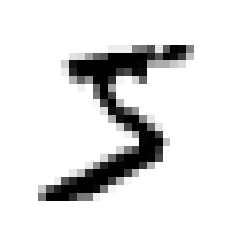

In [7]:
# CODE HERE 
ex_digit = x[0]
ex_image = ex_digit.reshape(28, 28)
plt.imshow(ex_image, cmap="binary")
plt.axis("off")
plt.show()

#### Split the data into train and test set

In [8]:
import numpy as np 

In [9]:
# CODE HERE 
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

#### access the label of the above digit image 

In [10]:
# CODE HERE
y[0]

'5'

### Training a <font color= red>Binary</font> classifier 


#### Create the target vectors for this classification task
***NOTE : you can try different number.***

In [21]:
# CODE HERE
# If you got stuck use GOOGLE
y_train_5 = (y_train == '5') 
y_test_5 = (y_test == '5')

### SGD classifier

#### Create a SGD classifier 

In [22]:
from sklearn.linear_model import SGDClassifier

In [26]:
# CODE HERE
sgd = SGDClassifier(random_state=43)
sgd.fit(x_train, y_train_5)

SGDClassifier(random_state=43)

#### use SGD classifier  to detect images of the number 5 

In [27]:
# CODE HERE

sgd.predict([ex_digit])

array([ True])

## Performance measure 

####  Measuring Accuracy Using <font color= blue>Cross-validation</font>

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
# CODE HERE
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.9629 , 0.96655, 0.9638 ])

#### Try a dumb classifier

In [31]:
# CODE HERE
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

#### find cross_val_score for the dumb classifier

In [32]:
#CODE HERE
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

## Confusion matrix

In [33]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#### try to find confusion matrix 

In [34]:
# CODE HERE
y_train_pred = cross_val_predict(sgd, x_train, y_train_5, cv=3)

confusion_matrix(y_train_5, y_train_pred)

array([[53756,   823],
       [ 1312,  4109]], dtype=int64)

####  try perfect classifier which will have only true positives and true negative


In [35]:
# CODE HERE
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

## Precision and Recall

In [36]:
from sklearn.metrics import precision_score, recall_score,f1_score

***Note that precision and recall score might be different from one to anothor***

#### find precision score

In [37]:
# CODE HERE
precision_score(y_train_5, y_train_pred)

0.8331305758313058

#### find recall score

In [38]:
# CODE HERE
recall_score(y_train_5, y_train_pred)

0.7579782327983767

#### find f1 score 
***Notice that f1 score is harmonic mean between recall and precision***

In [39]:
# CODE HERE
f1_score(y_train_5, y_train_pred)

0.7937795807978364

# Precision/Recall Tradeof

#### try to use decision_function() and make prediction

In [40]:
# CODE HERE
y_scores = sgd.decision_function([ex_digit])
y_scores

array([1633.17856965])

#### Set the threshold to zero

In [41]:
# CODE HERE
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

#### Set the threshold to 200000

In [42]:
# CODE HERE
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

#### To decide which threshold you want to use find decision scores for all instances

In [43]:
# CODE HERE
y_scores = cross_val_predict(sgd, x_train, y_train_5, cv=3, method="decision_function")
y_scores

array([ -1159.09808391, -19461.73382643, -24704.77555644, ...,
         9022.82246601,  -4475.21666167, -11407.53691907])

#### computing precision and recall for all possible thresholds using the precision_recall_curve() 

In [44]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

#### plot precision and recall as functions of the threshold value using Matplotlib

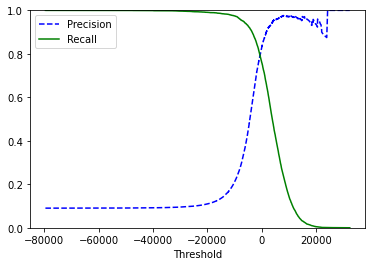

<Figure size 720x360 with 0 Axes>

In [47]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
    plt.figure(figsize=(10,5)) 
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

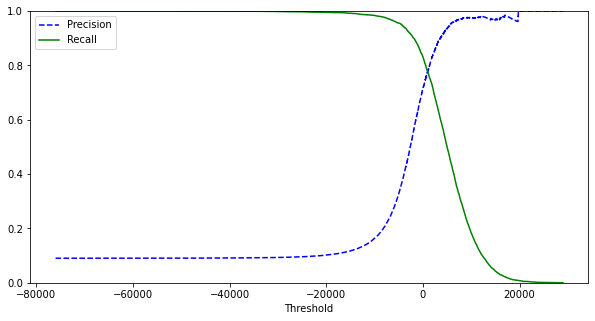

In [32]:
# CODE HERE
plt.figure(figsize=(10,5)) 



#### lets aim for 90%recall 
#### try different threshold and see what will happen

#### precision score

In [55]:
# CODE HERE
threshold_90_recall = thresholds[np.argmax(recalls >= 0.90)]

y_train_pred_90 = (y_scores >= threshold_90_recall)
precision_score(y_train_5, y_train_pred_90)

0.09041479727137781

#### recall score

In [51]:
#CODE HERE
recall_score(y_train_5, y_train_pred_90)

1.0

# The ROC Curve

In [56]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

#### plot the FPR against the TPR using Matplotlib

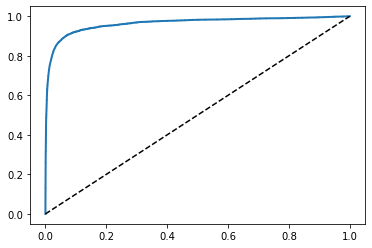

In [57]:
# CODE HERE
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr)
plt.show()

#### computing the ROC AUC score

In [58]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9635950398529254

# RandomForest Classifier
#### train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
# CODE HERE
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3,
method="predict_proba")

#### try to plot ROC 
***Notice that you will need scores not probabilities***

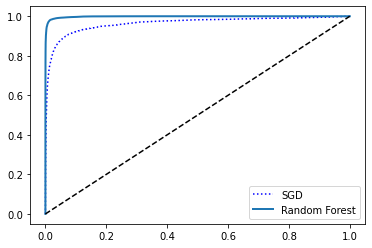

In [62]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

#### find ROC AUC score for randomforestclassifier

In [63]:
# CODE HERE 
roc_auc_score(y_train_5, y_scores_forest) 

0.9983436731328145


# Congrats you did it 🥳 !
# #shAI_Club